In [2]:
import random
import matplotlib.pyplot as plt

def fuzz(k):
    return k * random.gauss(0,1)

def make_data(alpha, beta, n=100, k=0.7):
    x = [random.uniform(-3,3) for _ in range(n)]
    y = [beta * xi + alpha + fuzz(k) for xi in x]
    return x, y

def mean(x):
    return sum(x)/len(x)

def ss(x):
    xm = mean(x)
    return sum([(xi - xm)**2 for xi in x])

def standard_deviation(x):
    ssx = ss(x)
    return (ssx / len(x))**0.5

def correlation(x, y):
    xm, ym = mean(x), mean(y)
    ssx, ssy = ss(x), ss(y)
    sscross = sum([(xi-xm)*(yi-ym) for xi, yi in zip(x, y)])
    return sscross / (ssx * ssy)**0.5

def linreg(x, y):
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta


alpha true: -5, beta true: 3
alpha est: -5.001654537013284, beta est: 2.8648380625514505


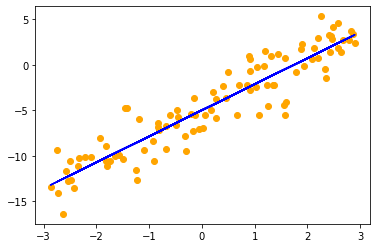

In [5]:
alpha_true, beta_true = -5, 3
x, y = make_data(alpha_true, beta_true, k=2)
alpha, beta = linreg(x, y)
print(f"alpha true: {alpha_true}, beta true: {beta_true}")
print(f"alpha est: {alpha}, beta est: {beta}")
plt.scatter(x, y, color='orange')
plt.plot(x, [beta*xi + alpha for xi in x], color='blue');